# More Examples

## Titanic Disaster: Basic EDA using Pandas

### Introduction:

Variables check [here](https://www.kaggle.com/c/titanic/data)


### Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Control figure aesthetics
import numpy as np
%matplotlib inline

### Data Ingestion

In [2]:
url = 'http://www.matem.unam.mx/~benjamin/train.csv'

titanic = pd.read_csv(url)

titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
titanic.shape

(891, 12)

## Embarkation ports 
- Cherbourg  
- Southampton 
- Queenstown

In [4]:
titanic.Embarked.replace(['C', 'S', 'Q'],['Cherbourg', 'Southampton','Queenstown'],  inplace=True)

In [5]:
titanic.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin     Embarked  
0      0         A/5 21171   7.2500   NaN  Southampton  
1      0          PC 17599  71.2833   C85    Cherbourg  
2      0  STON/O2. 3101282   7.9250   NaN  Southampton  
3      0            113803  53.1000  C123  Southampton  
4      0            373450   8.0500   NaN  Southampton

In [6]:
titanic.groupby(['Sex','Embarked'], as_index=False).agg({'Age':['mean','std','count'],\
                                    'Survived':['sum','count'], 'Fare':['mean']})

Sex     Embarked       Fare        Age                  Survived      
                             mean       mean        std count      sum count
0  female    Cherbourg  75.169805  28.344262  15.770830    61       64    73
1  female   Queenstown  12.634958  24.291667   8.147667    12       27    36
2  female  Southampton  38.740929  27.771505  13.690703   186      140   203
3    male    Cherbourg  48.262109  32.998841  14.905440    69       29    95
4    male   Queenstown  13.838922  30.937500  21.122559    16        3    41
5    male  Southampton  21.711996  30.291440  14.310342   368       77   441

```sum()``` is for like 1+0 = 1. if data is 3 and 3 then it return 6.

```count()``` return number of row. so it will return 2.

Discrepancies in survived: not all survived of course, Age, null's?

In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic[['Survived']].isnull().sum()

Survived    0
dtype: int64

In [9]:
titanic[['Age']].isnull().sum()

Age    177
dtype: int64

### Passenger Id as  index 

In [10]:
titanic.set_index('PassengerId').head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin     Embarked  
PassengerId                                                              
1                1      0         A/5 21171   7.2500   NaN  Southampton  
2                1      0          PC 17599  71.2833   C85    Cherbourg  
3                0      0  STON/O2. 3101282   7.9250   NaN  Southampton  
4                1      0            113803  53.1000  C123  Southampton  
5                0      0            373450   8.0500   NaN  Southampton

### Pie chart presenting the male/female proportion

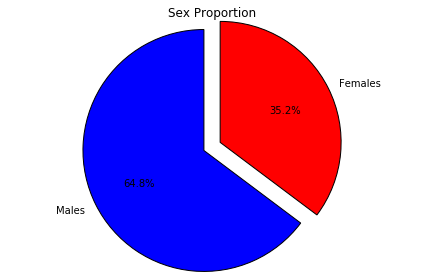

In [11]:
# sum the instances of males and females
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()

# put them into a list called proportions
proportions = [males, females]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['Males', 'Females'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction - decimal precision
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Sex Proportion")

# View the plot
plt.tight_layout()
plt.show()

### Scatterplot with the Fare payed and the Age, differ the plot color by gender

(-5, 85)

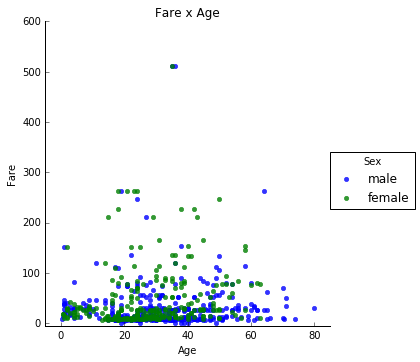

In [12]:
# creates the plot using
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False) #note fit false

# set title
lm.set(title = 'Fare x Age')

# get the axes object and tweak it
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

### Number of  survivors

In [13]:
titanic.Survived.sum()

342

### Histogram with the Fare payed

![dicaprio](datasets/tickets.jpg) 

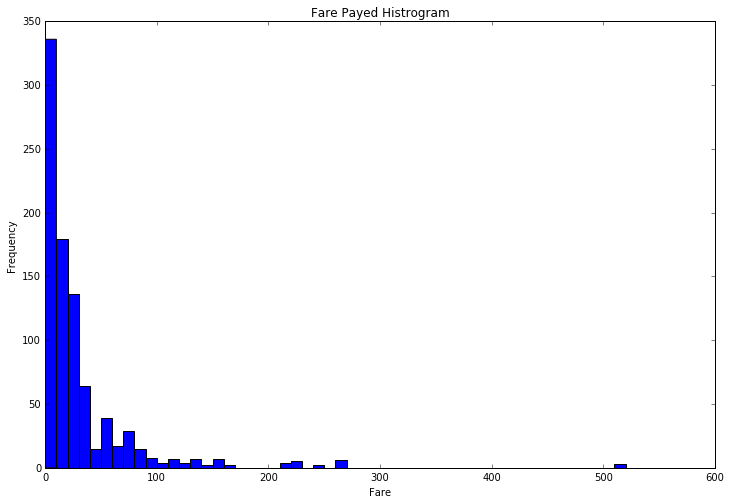

In [14]:
# sort the values from the top to the least value and slice the first 5 items
df = titanic.Fare.sort_values(ascending = False)
df

# create bins interval using numpy
binsVal = np.arange(0,600,10)
binsVal

# create the plot
plt.figure(figsize=(12,8))
plt.hist(df, bins = binsVal)

# Set the title and labels
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')

# show the plot
plt.show()

## Earthquake Data, Loma Prieta CA 1989

In [15]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

Aftershock data above Magnitude 2.0 for one week after 
the Loma Prieta 1989 earthquake (1009 earthquake replicas).

Full header:
    
Your search parameters are:
    
catalog=ANSS  (Advanced National Seismic System)

start_time=1989/10/18,00:00:00
        
end_time=1989/10/25,00:00:00 
        
minimum_magnitude=2.0

maximum_magnitude=10

event_type=E

In [16]:
# Read in earthquake data
df = pd.read_csv('datasets/LomaPrieta1989.csv', skiprows = 7)

# Get the latitude and logitude of the earthquakes, as matrix uses the numpy representation
coords = df.as_matrix(columns=['Latitude', 'Longitude'])

In [17]:
df.head()

DateTime  Latitude  Longitude  Depth  Magnitude MagType  \
0  1989/10/18 00:04:15.19   37.0362  -121.8798  17.21        7.0      ML   
1  1989/10/18 00:07:15.29   37.2382  -121.9445   9.37        4.7      ML   
2  1989/10/18 00:07:43.30   36.9880  -121.7413  15.26        4.7      ML   
3  1989/10/18 00:08:21.99   37.0702  -121.8940  10.43        4.4      ML   
4  1989/10/18 00:08:45.47   37.0760  -121.9250   2.96        4.3      ML   

   NbStations    Gap  Distance   RMS Source     EventID  
0        80.0   89.0       1.0  0.08     NC    216859.0  
1         8.0   81.0      16.0  0.16     NC  10090521.0  
2        12.0  121.0       8.0  0.06     NC  10090522.0  
3        11.0  133.0       7.0  0.16     NC  10090523.0  
4         6.0  248.0      14.0  0.03     NC  10090509.0

Matplotlib docs

longitude, latitudes of lower(upper) left(right) hand corner of the desired map domain (degrees).

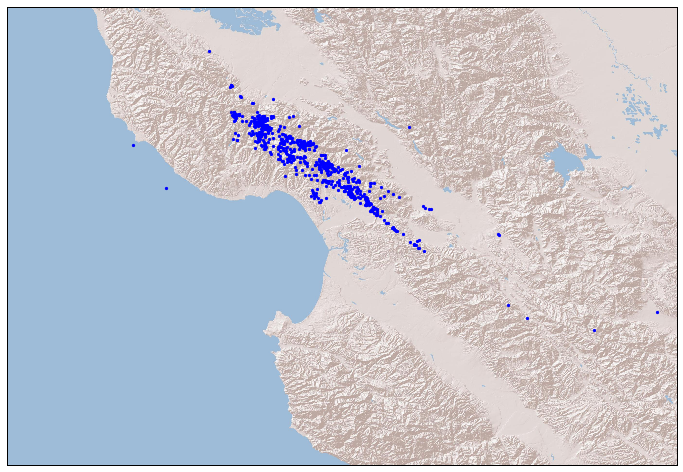

In [18]:
#location of the earthquakes

plt.figure(figsize = (12, 12))

m = Basemap(projection='merc', resolution='l', epsg = 4269, 
            llcrnrlon=-122.7,llcrnrlat=36.2, urcrnrlon=-120.8,urcrnrlat=37.5)

# plot the aftershock
x, y = m(coords[:, 1], coords[:, 0])
m.scatter(x,y,5,marker='o',color='b')
m.arcgisimage(service='World_Shaded_Relief', xpixels = 5000, verbose= False)
    
plt.show()